<a href="https://colab.research.google.com/github/ELopez2657/Python_proyect_1_Homicide_Rate_by_Country/blob/main/Homicide_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
df = pd.read_csv('homicide_rate_data.csv')

In [75]:
df.head(5)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012


### **Data exploration**

In [33]:
df.shape

(195, 6)

In [34]:
df.dtypes

Location      object
Region        object
Subregion     object
Rate         float64
Count          int64
Year           int64
dtype: object

In [35]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

### Data cleaning

In [76]:
df['Region']=df['Region'].replace('Americas','America')

In [77]:
# my_list = ['rate','year']
# for i in mylist:
#   df[i]= df[i].astype(int)

df['Rate']= df['Rate'].astype(int)

In [78]:
df1 = df.sort_values('Count', ascending=False).reset_index(drop=True)
df1.head(10)

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,America,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,America,Central America,28,36579,2020
4,United States,America,Northern America,6,21570,2020
5,South Africa,Africa,Southern Africa,33,19846,2020
6,Myanmar,Asia,South-Eastern Asia,28,15299,2021
7,Colombia,America,South America,22,11520,2020
8,Russia,Europe,Eastern Europe,7,10697,2020
9,Venezuela,America,South America,36,10598,2018


### **Top 10 Countries with most Homicides**

In [79]:
df1= df[['Location', 'Count']].sort_values('Count', ascending=False).reset_index(drop=True).head(10)
df1['Percentage']= (df1['Count']*100/df1['Count'].sum()).round(2)
df1

,Location,Count,Percentage
0,Brazil,47722,18.45
1,Nigeria,44200,17.09
2,India,40651,15.71
3,Mexico,36579,14.14
4,United States,21570,8.34
5,South Africa,19846,7.67
6,Myanmar,15299,5.91
7,Colombia,11520,4.45
8,Russia,10697,4.14
9,Venezuela,10598,4.10


<Figure size 1000x600 with 0 Axes>

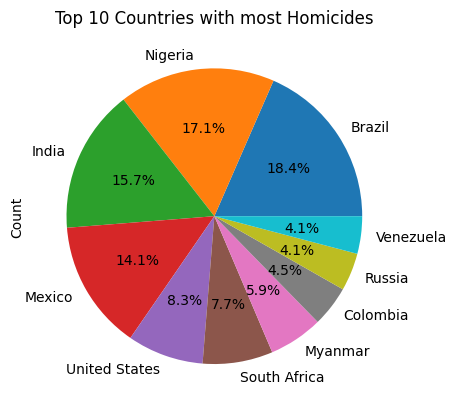

In [104]:
#fig=figure(figsize=(10,6))
plt.figure(figsize=(10, 6))

# Grafica el gráfico de pastel
df1.plot(y='Count', x='Location', kind='pie', labels=df1.Location, autopct='%1.1f%%')
plt.title('Top 10 Countries with most Homicides')
plt.legend().set_visible(False)
# Muestra el gráfico
plt.show()

### **Homicide by Continent**

In [81]:
df2=df.groupby('Region')['Count'].sum().sort_values(ascending=True)
df2

Region
Oceania       347
Europe      19869
Africa      99481
Asia       105552
America    153597
Name: Count, dtype: int64

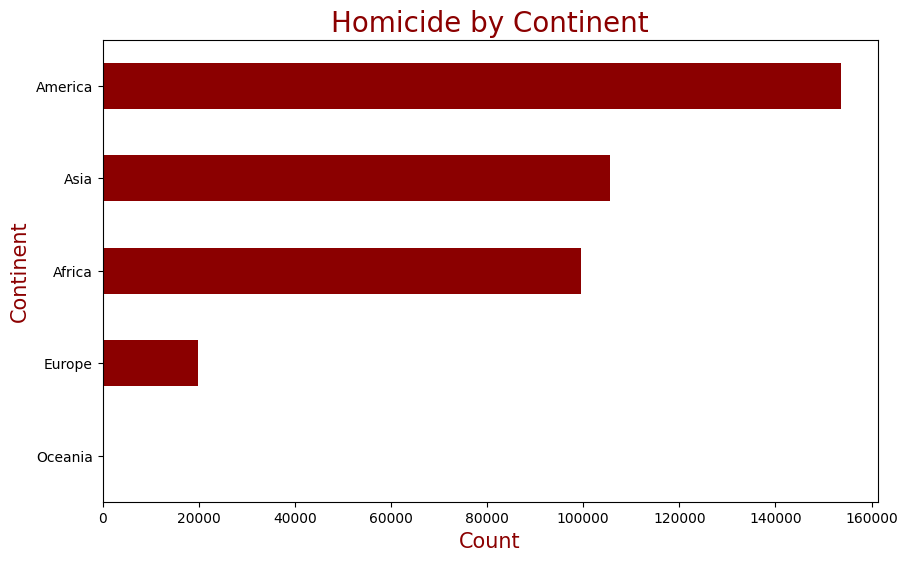

In [192]:
plt.figure(figsize=(10, 6))
df2.plot(kind='barh', color='DarkRed')
plt.title('Homicide by Continent', fontsize=20, color='DarkRed')
plt.xlabel('Count', fontsize=15, color='DarkRed')
plt.ylabel('Continent', fontsize=15, color='DarkRed')
plt.show()


### **Homicide by SubRegion**

In [83]:
df3=df.groupby('Subregion')['Count'].sum().sort_values(ascending=False)
df3

Subregion
South America             78872
Southern Asia             58631
Central America           47371
Western Africa            46318
South-Eastern Asia        25314
Eastern Africa            23669
Northern America          22317
Southern Africa           21479
Eastern Europe            14604
Western Asia              11638
Eastern Asia               8563
Northern Africa            5538
Caribbean                  5037
Middle Africa              2477
Northern Europe            2097
Western Europe             2075
Central Asia               1406
Southern Europe            1093
Australia, New Zealand      347
Name: Count, dtype: int64

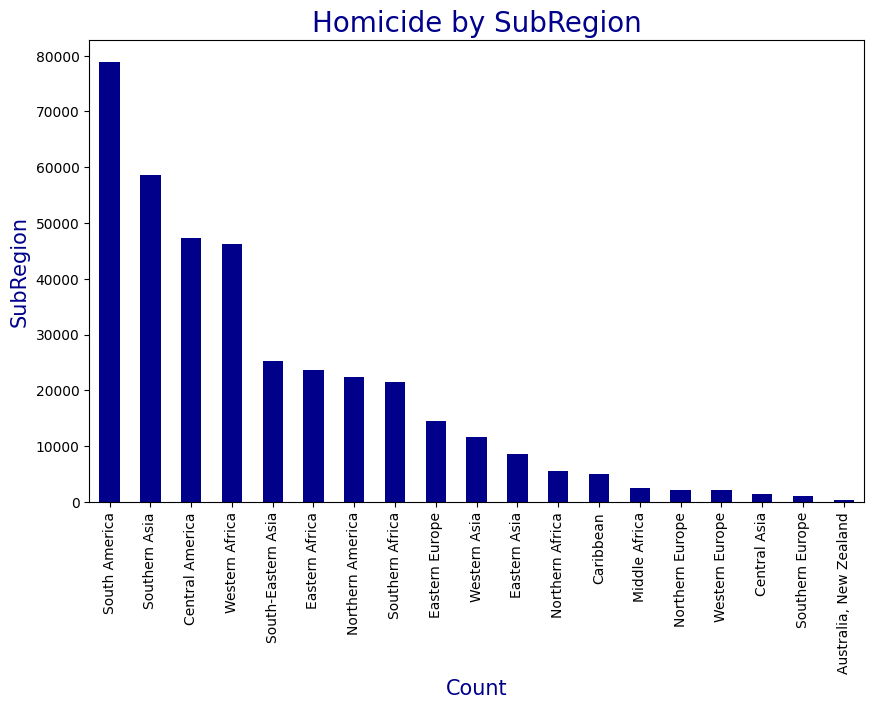

In [84]:
plt.figure(figsize=(10, 6))
df3.plot(kind='bar', color='DarkBlue')
plt.title('Homicide by SubRegion', fontsize=20, color='DarkBlue')
plt.xlabel('Count', fontsize=15, color='DarkBlue')
plt.ylabel('SubRegion', fontsize=15, color='DarkBlue')
plt.show()

<ipython-input-106-58970d03bd96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df3.index, y=df3.values,  palette='Set2' ,edgecolor='black')


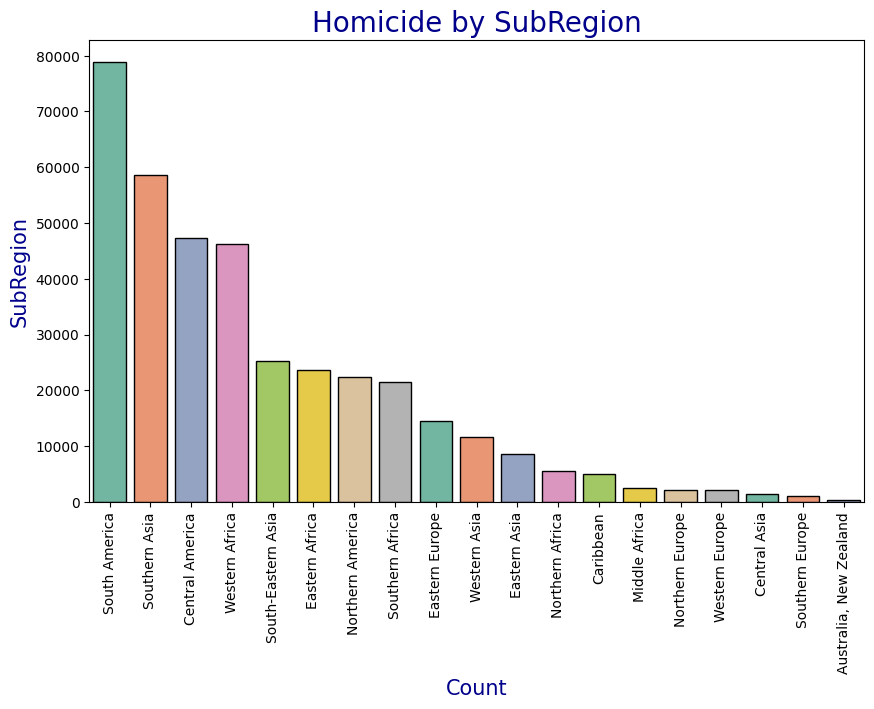

In [106]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df3.index, y=df3.values,  palette='Set2' ,edgecolor='black')
plt.title('Homicide by SubRegion', fontsize=20, color='DarkBlue')
plt.xlabel('Count', fontsize=15, color='DarkBlue')
plt.ylabel('SubRegion', fontsize=15, color='DarkBlue')
plt.xticks(rotation='vertical')
xlabel=None

### Homicide by SubRegion(America & Europa) and Year

In [85]:
df['Year'].value_counts().sort_values()

2007     1
2021     1
2008     1
2006     2
2010     3
2014     5
2013     5
2011     5
2009     6
2016     9
2015     9
2017    10
2012    11
2018    13
2019    20
2020    94
Name: Year, dtype: int64

In [90]:
#df[df['Region'].isin(['Asia','Europa'])]
df4 = df[(df['Region']=='America') | (df['Region']=='Europe')]

In [91]:
df4 = df4[df4['Year']>2016][['Region','Year','Count']]

In [92]:
df4= df4.groupby(['Region','Year']).sum()['Count']
df4

Region   Year
America  2018     13793
         2019      4276
         2020    134784
Europe   2017      3670
         2018       883
         2019       249
         2020     15066
Name: Count, dtype: int64

In [51]:
df_unstacked = df4.unstack(level=0)
df_unstacked.index = df_unstacked.index.astype(str)
# for i in df_unstacked.index:
#     df_unstacked[i]=df_unstacked[i].astype(int)

Text(0, 0.5, 'Count')

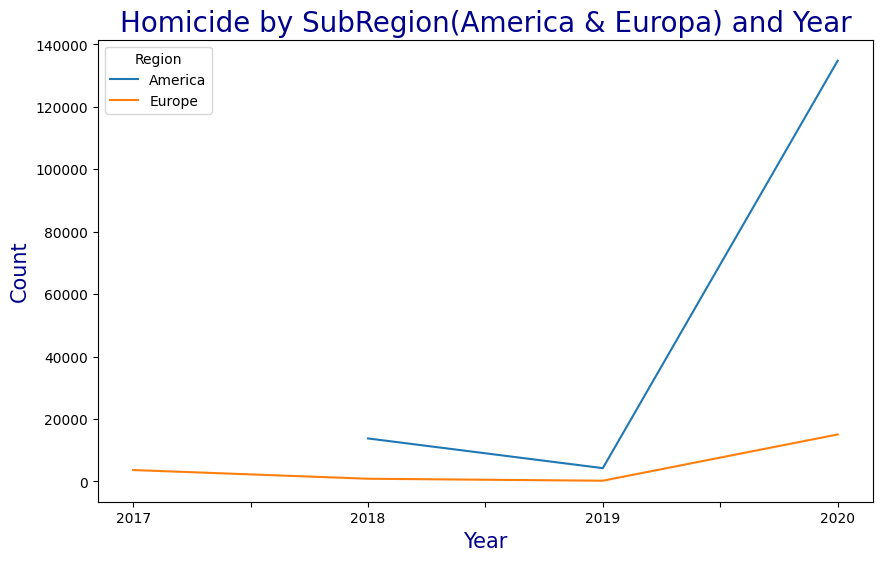

In [193]:
df_unstacked.plot(kind='line', figsize=(10,6))
plt.title('Homicide by SubRegion(America & Europa) and Year', fontsize=20, color='DarkBlue')
plt.xlabel('Year', fontsize=15, color='DarkBlue')
plt.ylabel('Count', fontsize=15, color='DarkBlue')

### Sum rate by Year

In [94]:
df_unstacked.index

Index(['2017', '2018', '2019', '2020'], dtype='object', name='Year')

In [100]:
df5 = df.groupby('Year')['Rate'].sum().sort_values(ascending=True)

<ipython-input-194-b79641d133a1>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




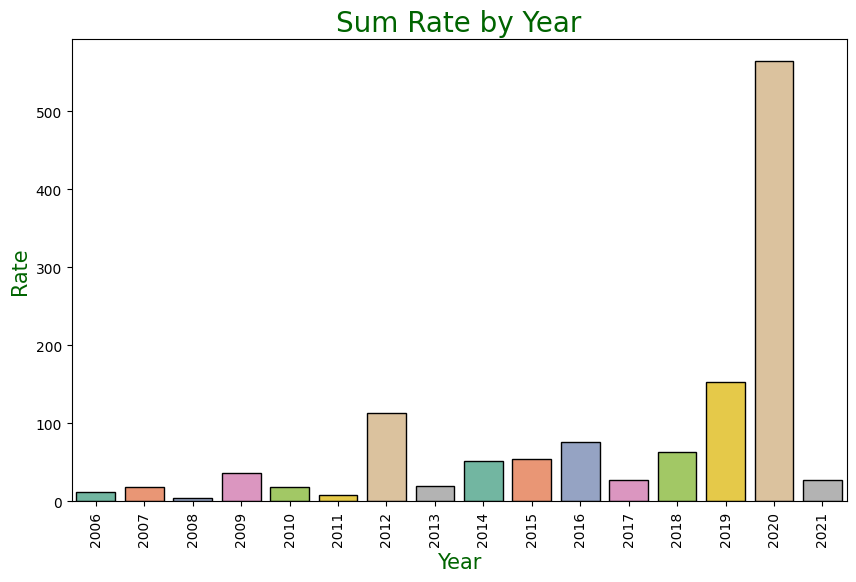

In [194]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df5.index, y=df5.values,  palette='Set2',edgecolor='black' )
plt.title('Sum Rate by Year', fontsize=20, color='DarkGreen')
plt.xlabel('Year', fontsize=15, color='DarkGreen')
plt.ylabel('Rate', fontsize=15, color='DarkGreen')
plt.xticks(rotation='vertical')
xlabel=None

### Sum of Homicide by Country and Year

In [154]:
df6=df[['Year','Region','Count']]
df6=df6.groupby(['Year','Region']).sum().sort_values(by='Year', ascending=False)
df6.head(10)

Count
Year Region         
2021 Asia      15299
2020 Oceania     221
     Europe    15066
     Asia      53516
     America  134784
     Africa    28460
2019 Asia       6458
     Africa    44210
     America    4276
     Europe      249

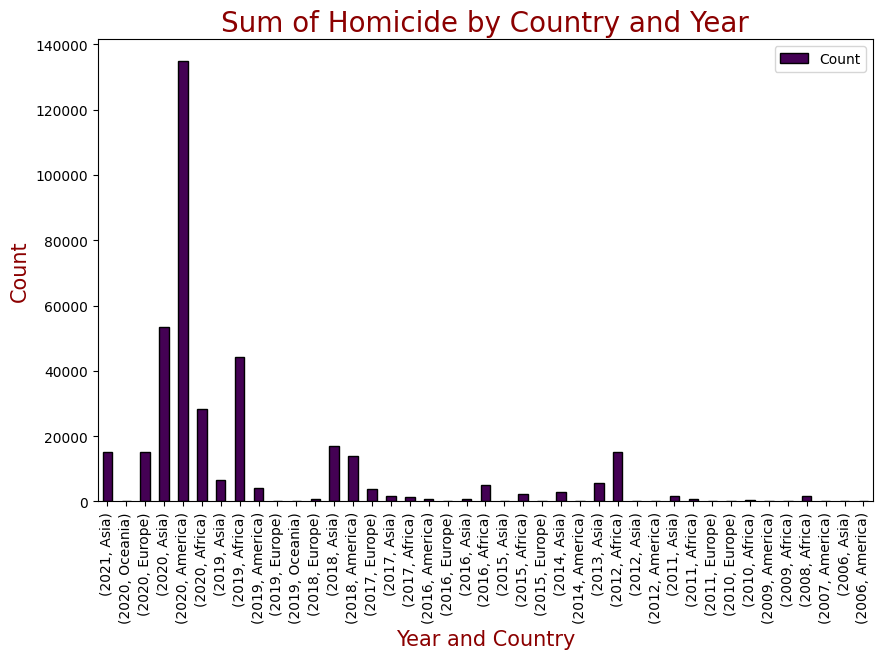

In [191]:
df6.plot(kind='bar', figsize=(10,6), colormap='viridis',edgecolor='black')

plt.title('Sum of Homicide by Country and Year', fontsize=20, color='DarkRed')
plt.xlabel('Year and Country', fontsize=15, color='DarkRed')
plt.ylabel('Count', fontsize=15, color='DarkRed')
plt.xticks(rotation='vertical')
xlabel=None

### TreeMap Subregion Count

In [162]:
df7=df.groupby('Subregion')['Count'].mean().sort_values(ascending=False).round(2)
df7

Subregion
Southern Asia             6514.56
South America             6067.08
Central America           5921.38
Northern America          4463.40
Southern Africa           4295.80
Western Africa            4210.73
South-Eastern Asia        2531.40
Eastern Africa            1577.93
Eastern Europe            1460.40
Eastern Asia              1223.29
Northern Africa           1107.60
Middle Africa              619.25
Western Asia               581.90
Central Asia               281.20
Western Europe             230.56
Caribbean                  201.48
Australia, New Zealand     173.50
Northern Europe            139.80
Southern Europe             64.29
Name: Count, dtype: float64

In [182]:
data = {
    "Category": df7.index,
    "Value": df7.values
}
data

df7=pd.DataFrame(data)
df7

,Category,Value
0,Southern Asia,6514.56
1,South America,6067.08
2,Central America,5921.38
3,Northern America,4463.40
4,Southern Africa,4295.80
5,Western Africa,4210.73
6,South-Eastern Asia,2531.40
7,Eastern Africa,1577.93
8,Eastern Europe,1460.40
9,Eastern Asia,1223.29


In [195]:
figure = px.treemap(df7, path=['Category'], values='Value', title='Homicide by SubRegion')
figure.update_layout(width=850, height=650)
figure.update_layout(title_x=0.5)

figure.show()

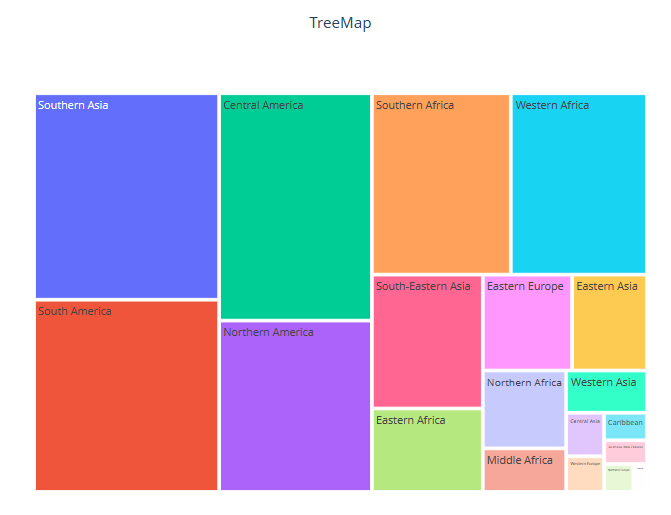